In [1]:
# 영화의 평점 예측해 보기
# 데이터를 필요에 따라 시각화 해보면서... 가능하면 의미있는 피처들을 추출
#  - 피처들을 선택..
#  - 1. 모든 피처를 학습
#  - 2. 피처의 중요도를 확인해서 중요한 피처만 선택
#  - 3. 상관관계를 보고 제거
#  - 4. 수식에 참여한(선영회귀)  가중치들을 오름차순으로 배열한후 단계적으로 제거하면서 재 학습
#  - 5. 상황에 따라서 기존 피처에는 없지만 groupby 기타 등등 이용해서 의미있는 피처를 생산

# 다양한 머신러닝 알고리즘을 적용해서 성능 좋은 알고리즘을 채택
#  - 교차분석, 파라메터튜이(하이퍼파라메터)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
r_df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/r.dat',
                   sep='::',header=None)

m_df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/m.dat',
                   sep='::',header=None,encoding='ISO-8859-1')

u_df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/u.dat',
                   sep='::',header=None,encoding='ISO-8859-1')

In [29]:
r_df.columns = ['user_id','movie_id','rating','time']
m_df.columns = ['movie_id','title','genre']
u_df.columns = ['user_id','gender','age','occupation','zipcode']

In [30]:
r_df.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [31]:
m_df.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [32]:
u_df.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [37]:
r_df.isna().sum(),m_df.isna().sum(),u_df.isna().sum()

(user_id     0
 movie_id    0
 rating      0
 time        0
 dtype: int64,
 movie_id    0
 title       0
 genre       0
 dtype: int64,
 user_id       0
 gender        0
 age           0
 occupation    0
 zipcode       0
 dtype: int64)

In [ ]:
# 평점이 매겨진 영화의 개수, 평점에 참여한 유저의 수, 평점의 히스토그램(구간)

In [47]:
# 평점이 매겨진 영화의 개수
len(r_df['movie_id'].unique())

3706

In [49]:
# 평점에 참여한 유저수
len(r_df['user_id'].unique())

6040

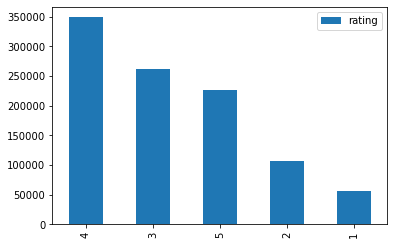

In [73]:
# 평점의 히스토그램(구간)
pd.DataFrame( r_df['rating'].value_counts() ).plot.bar()
plt.show()

In [79]:
r_df['rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

In [80]:
len(r_df['rating'])

1000209

In [81]:
# 장르별 영화평점
# 소수가 높게평가한거랑. 다수가 낮게 평가한거랑.. 차이가 있을수 있으니 

# r_df and m_df를 movie_id 공통컬럼.. 이 컬럼을 기준으로 두 테이블의 합친후
# 장르별로 groupby를 해서 rating의 합과 유저의 수를 구한다.

In [85]:
rm_merge_df =  pd.merge(r_df,m_df, how='inner',on='movie_id')
rm_merge_df.head()

,user_id,movie_id,rating,time,title,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [89]:
mr_merged_df =  rm_merge_df.groupby('genre').agg({
    'rating':'sum',
    'user_id':'count'
})
print(type(mr_merged_df))
mr_merged_df.head()

<class 'pandas.core.frame.DataFrame'>


,rating,user_id
genre,,
Action,41302,12311
Action|Adventure,38408,10446
Action|Adventure|Animation,1431,345
Action|Adventure|Animation|Children's|Fantasy,365,135
Action|Adventure|Animation|Horror|Sci-Fi,2192,618


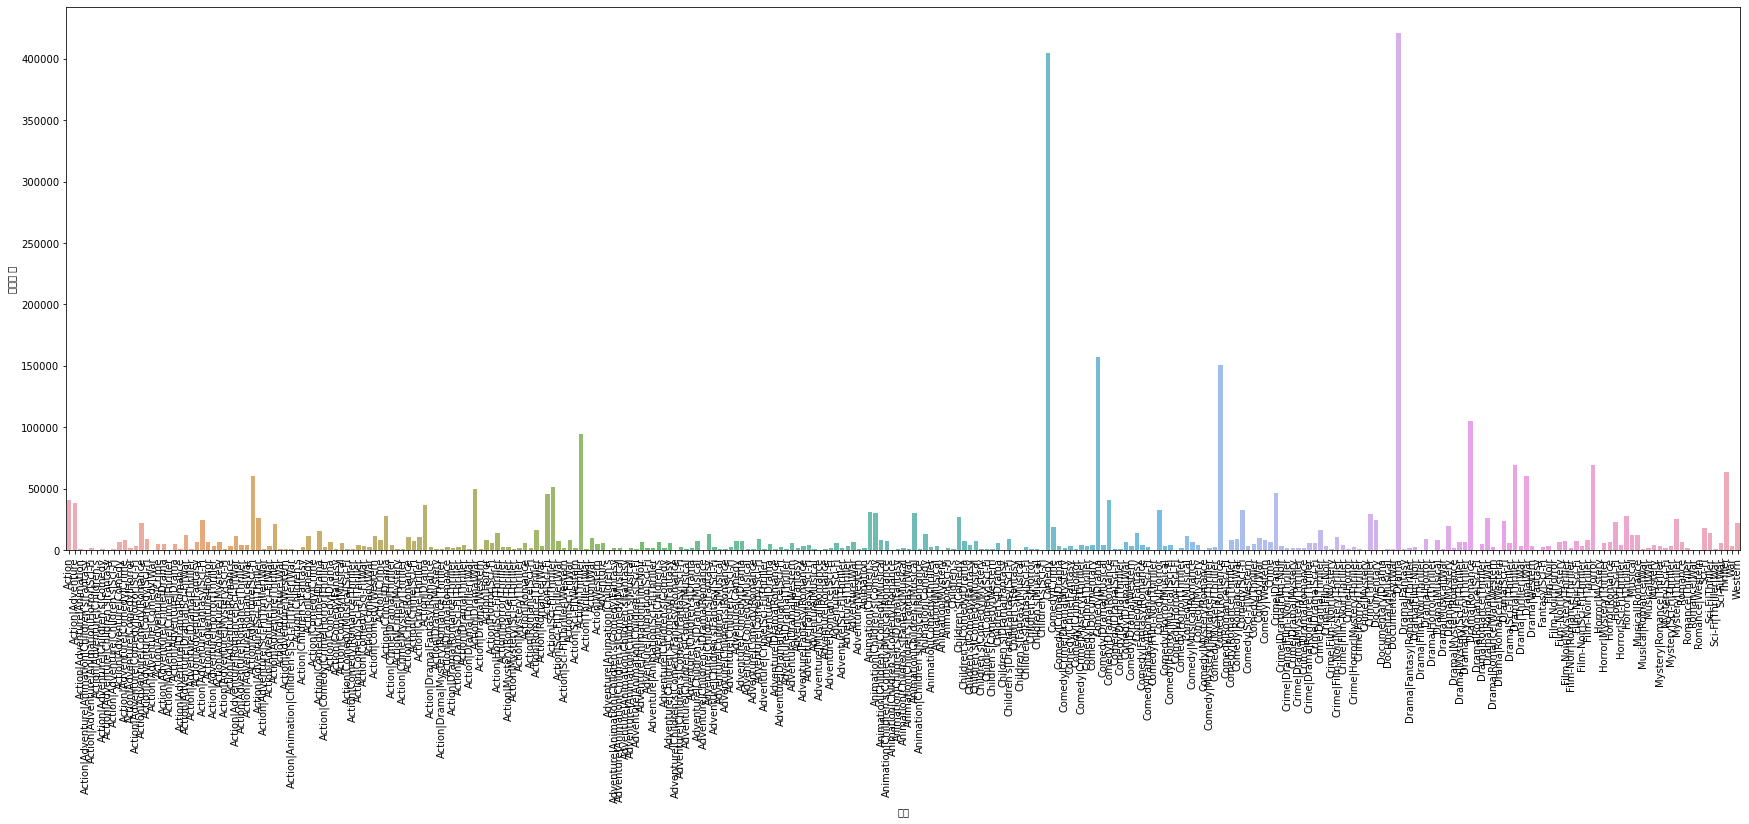

In [100]:
import seaborn as sns
plt.figure(figsize=(30,10))
ax = sns.barplot(mr_merged_df['rating'].index,mr_merged_df['rating'].values,alpha=0.8)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xlabel("장르")
plt.ylabel("평점의 합")
plt.show()